# **Part 3: Dimension reduction**
---

Dimension reduction refers to the process of reducing the number of variables or features in a dataset while retaining as much relevant information as possible. The goal of dimension reduction is to simplify the dataset, make it more manageable, and reduce noise and redundancy in the data.<br>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
from IPython.display import display
sb.set() 

In [3]:
factors = pd.read_pickle('factors.pkl')
cast = pd.read_pickle('cast.pkl')
director = pd.read_pickle('director.pkl')
production_companies = pd.read_pickle('production_companies.pkl')
success = pd.read_pickle('success.pkl')
genres = pd.read_pickle('genres.pkl')


### analysis of *casts* and success factors *(profit and popularity)*

#### *cast*

In [4]:
cast_combined = pd.concat([success, cast], axis=1)
cast_combined

,popularity,profit,cast
0,32.985763,1.363529e+09,Chris Pratt
0,32.985763,1.363529e+09,Bryce Dallas Howard
0,32.985763,1.363529e+09,Irrfan Khan
0,32.985763,1.363529e+09,Vincent D'Onofrio
0,32.985763,1.363529e+09,Nick Robinson
...,...,...,...
1286,1.157930,1.383000e+08,John Belushi
1286,1.157930,1.383000e+08,Tim Matheson
1286,1.157930,1.383000e+08,John Vernon
1286,1.157930,1.383000e+08,Verna Bloom


#### *production_companies*

In [5]:
prod_combined = pd.concat([success, production_companies], axis=1)
prod_combined

,popularity,profit,production_companies
0,32.985763,1.363529e+09,Universal Studios
0,32.985763,1.363529e+09,Amblin Entertainment
0,32.985763,1.363529e+09,Legendary Pictures
0,32.985763,1.363529e+09,Fuji Television Network
0,32.985763,1.363529e+09,Dentsu
...,...,...,...
1285,1.198849,6.970000e+07,Compass International Pictures
1285,1.198849,6.970000e+07,Falcon International Productions
1286,1.157930,1.383000e+08,Universal Pictures
1286,1.157930,1.383000e+08,Oregon Film Factory


#### *director*

In [6]:
dir_combined = pd.concat([success, director], axis=1)
dir_combined

,popularity,profit,director
0,32.985763,1.363529e+09,Colin Trevorrow
1,28.419936,2.284364e+08,George Miller
2,13.112507,1.852382e+08,Robert Schwentke
3,11.173104,1.868178e+09,J.J. Abrams
4,9.335014,1.316249e+09,James Wan
...,...,...,...
1282,1.549139,1.547778e+08,Guy Hamilton
1283,1.910465,1.301957e+08,Terence Young
1284,1.778746,7.497449e+07,Peter R. Hunt
1285,1.198849,6.970000e+07,John Carpenter


#### *genre*

In [7]:
genres_combined = pd.concat([success, genres], axis=1)
genres_combined


,popularity,profit,genres
0,32.985763,1.363529e+09,Action
0,32.985763,1.363529e+09,Adventure
0,32.985763,1.363529e+09,Science Fiction
0,32.985763,1.363529e+09,Thriller
1,28.419936,2.284364e+08,Action
...,...,...,...
1284,1.778746,7.497449e+07,Action
1284,1.778746,7.497449e+07,Thriller
1285,1.198849,6.970000e+07,Horror
1285,1.198849,6.970000e+07,Thriller


### Removing noisy data by dropping variables that appeared less than 5 times

This is to improve accuracy of our analysis by removing casts that appeared less than 5 times as the corresponding values presented by them may not be accurate in depicting the relationship with the success factors.

#### *cast*

In [8]:
# count the number of occurrences of each cast member
cast_counts = cast_combined["cast"].value_counts()

# filter out casts that appear less than 5 times
valid_casts = cast_counts[cast_counts >= 5].index.tolist()

# create a new dataframe with only the valid casts
cast_filtered = cast_combined[cast_combined["cast"].isin(valid_casts)]

num_unique_indexes = cast_filtered.index.nunique()

# display the result
print("Number of unique index values in the dataframe: ", num_unique_indexes)
cast_filtered


Number of unique index values in the dataframe:  1051


,popularity,profit,cast
0,32.985763,1.363529e+09,Chris Pratt
1,28.419936,2.284364e+08,Tom Hardy
1,28.419936,2.284364e+08,Charlize Theron
2,13.112507,1.852382e+08,Kate Winslet
2,13.112507,1.852382e+08,Miles Teller
...,...,...,...
1279,2.508235,7.639876e+07,Sean Connery
1280,0.960984,-1.400000e+07,Kurt Russell
1282,1.549139,1.547778e+08,Roger Moore
1283,1.910465,1.301957e+08,Sean Connery


#### *production_companies*

In [9]:
# count the number of occurrences of each production company
prod_counts = prod_combined["production_companies"].value_counts()

# filter out production company that appear less than 5 times
valid_prod = prod_counts[prod_counts >= 5].index.tolist()

# create a new dataframe with only the valid production company
prod_filtered = prod_combined[prod_combined["production_companies"].isin(valid_prod)]

num_unique_indexes = prod_filtered.index.nunique()

# display the result
print("Number of unique index values in the dataframe: ", num_unique_indexes)
prod_filtered

Number of unique index values in the dataframe:  1077


,popularity,profit,production_companies
0,32.985763,1.363529e+09,Amblin Entertainment
0,32.985763,1.363529e+09,Legendary Pictures
0,32.985763,1.363529e+09,Dentsu
1,28.419936,2.284364e+08,Village Roadshow Pictures
2,13.112507,1.852382e+08,Summit Entertainment
...,...,...,...
1283,1.910465,1.301957e+08,Metro-Goldwyn-Mayer (MGM)
1284,1.778746,7.497449e+07,Eon Productions
1284,1.778746,7.497449e+07,Metro-Goldwyn-Mayer (MGM)
1284,1.778746,7.497449e+07,Danjaq


#### *director*

In [10]:
# count the number of occurrences of each director
dir_counts = dir_combined["director"].value_counts()

# filter out director that appear less than 2 times
valid_dir = dir_counts[dir_counts >= 2].index.tolist()

# create a new dataframe with only the valid director
dir_filtered = dir_combined[dir_combined["director"].isin(valid_dir)]

num_unique_indexes = dir_filtered.index.nunique()

# display the result
print("Number of unique index values in the dataframe: ", num_unique_indexes)
dir_filtered

Number of unique index values in the dataframe:  814


,popularity,profit,director
1,28.419936,2.284364e+08,George Miller
2,13.112507,1.852382e+08,Robert Schwentke
3,11.173104,1.868178e+09,J.J. Abrams
4,9.335014,1.316249e+09,James Wan
5,9.110700,3.979505e+08,Alejandro GonzÃ¡lez IÃ±Ã¡rritu
...,...,...,...
1280,0.960984,-1.400000e+07,John Carpenter
1281,2.010733,4.333061e+08,William Friedkin
1282,1.549139,1.547778e+08,Guy Hamilton
1283,1.910465,1.301957e+08,Terence Young


#### *genre*


In [11]:
# count the number of occurrences of each genre
genres_counts = genres_combined["genres"].value_counts()

# filter out genres that appear less than 5 times
valid_genres = genres_counts[genres_counts >= 5].index.tolist()

# create a new dataframe with only the valid genres
genres_filtered = genres_combined[genres_combined["genres"].isin(valid_genres)]
num_unique_indexes = genres_filtered.index.nunique()

# display the result
print("Number of unique index values in the dataframe: ", num_unique_indexes)
genres_filtered

Number of unique index values in the dataframe:  1287


,popularity,profit,genres
0,32.985763,1.363529e+09,Action
0,32.985763,1.363529e+09,Adventure
0,32.985763,1.363529e+09,Science Fiction
0,32.985763,1.363529e+09,Thriller
1,28.419936,2.284364e+08,Action
...,...,...,...
1284,1.778746,7.497449e+07,Action
1284,1.778746,7.497449e+07,Thriller
1285,1.198849,6.970000e+07,Horror
1285,1.198849,6.970000e+07,Thriller


In [12]:
cast_filtered.to_pickle('cast_filtered.pkl')
prod_filtered.to_pickle('prod_filtered.pkl')
dir_filtered.to_pickle('dir_filtered.pkl')
genres_filtered.to_pickle('genres_filtered.pkl')


### Identifying factors with low correlation 

The release year has a correlation of -0.0127 and 0.0592 with profit and popularity respectively. The release month has a correlation of 0.0272 and 0.0290 with profit and popularity respectively. 

Since there is close to no correlation (ie correlation = 0), we decided to remove release year and month from our analysis.

#### *release_year*

<Axes: xlabel='release_year', ylabel='profit'>

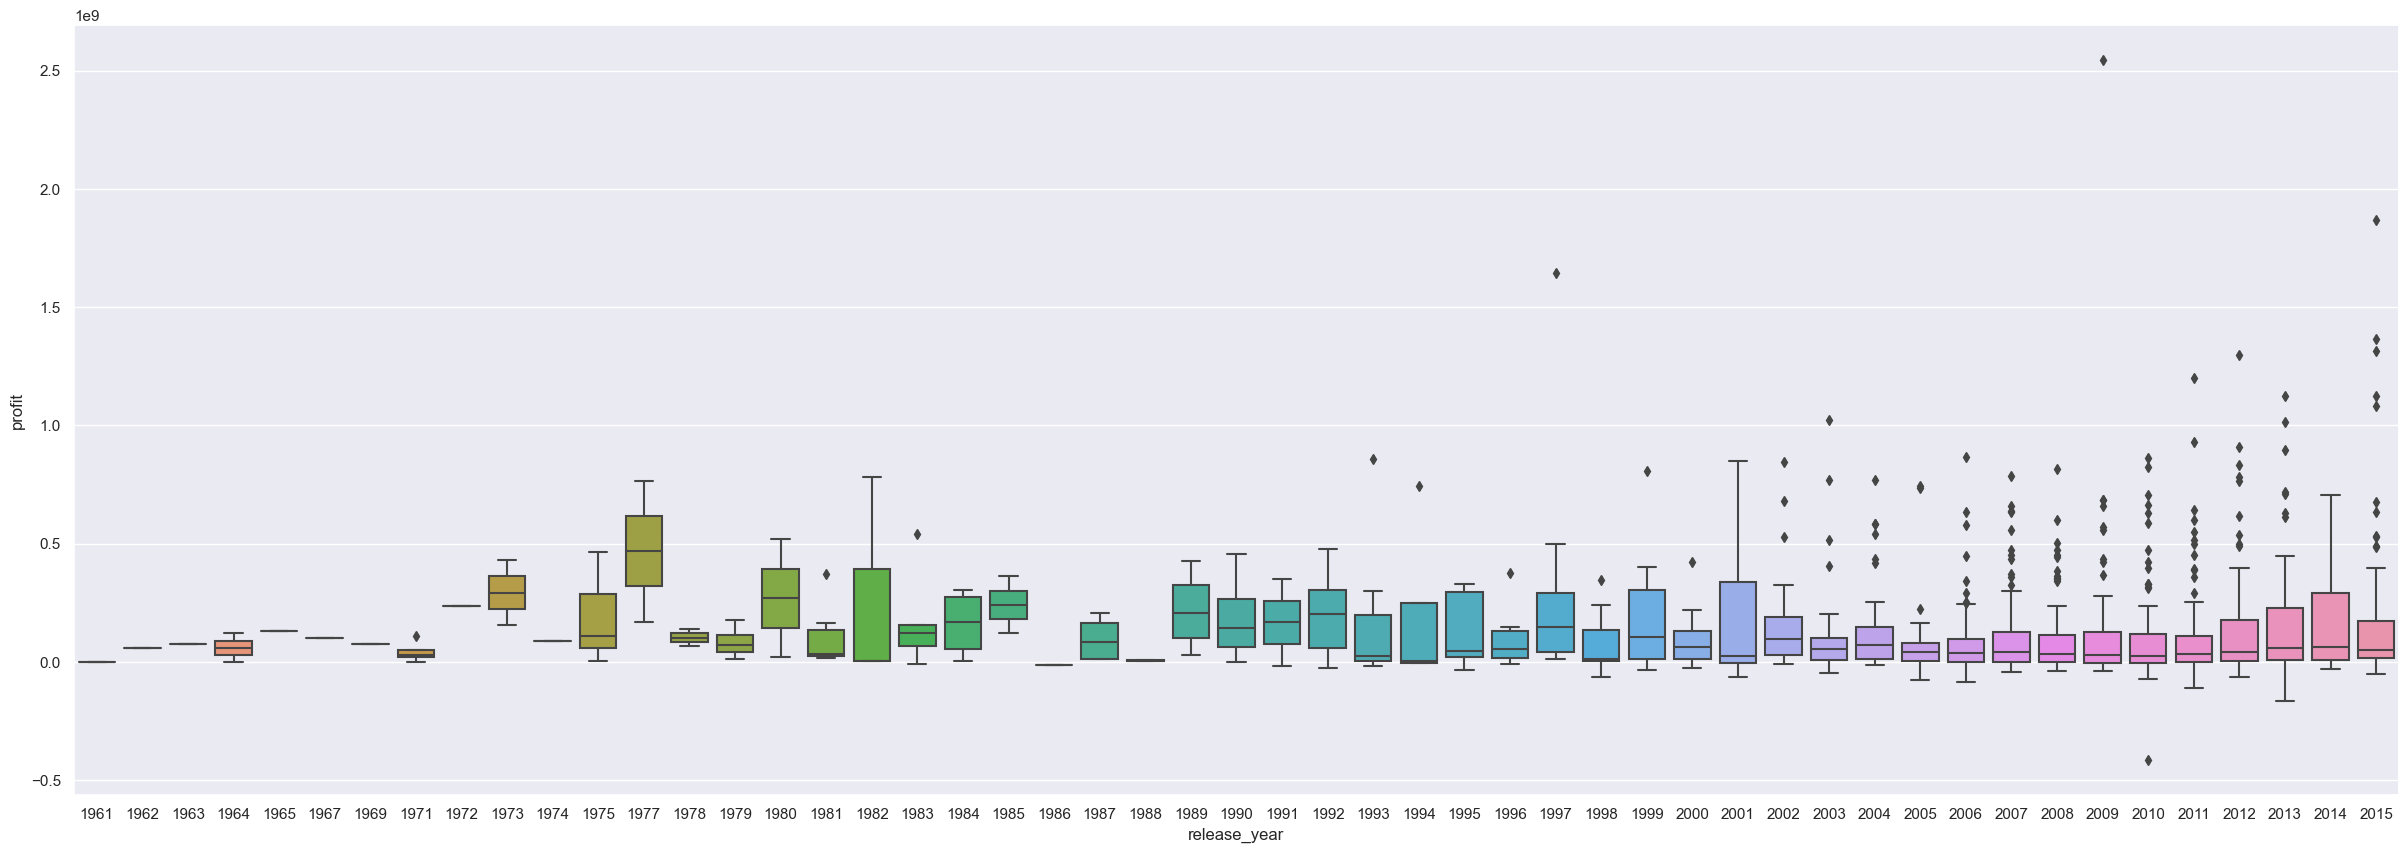

In [13]:
allfactors = pd.read_pickle('allfactors.pkl')
plt.figure(figsize=(30, 10))
data = allfactors[['release_year', 'profit']]
sb.boxplot(data=data, x="release_year", y="profit", orient = 'v')

<Axes: xlabel='release_year', ylabel='popularity'>

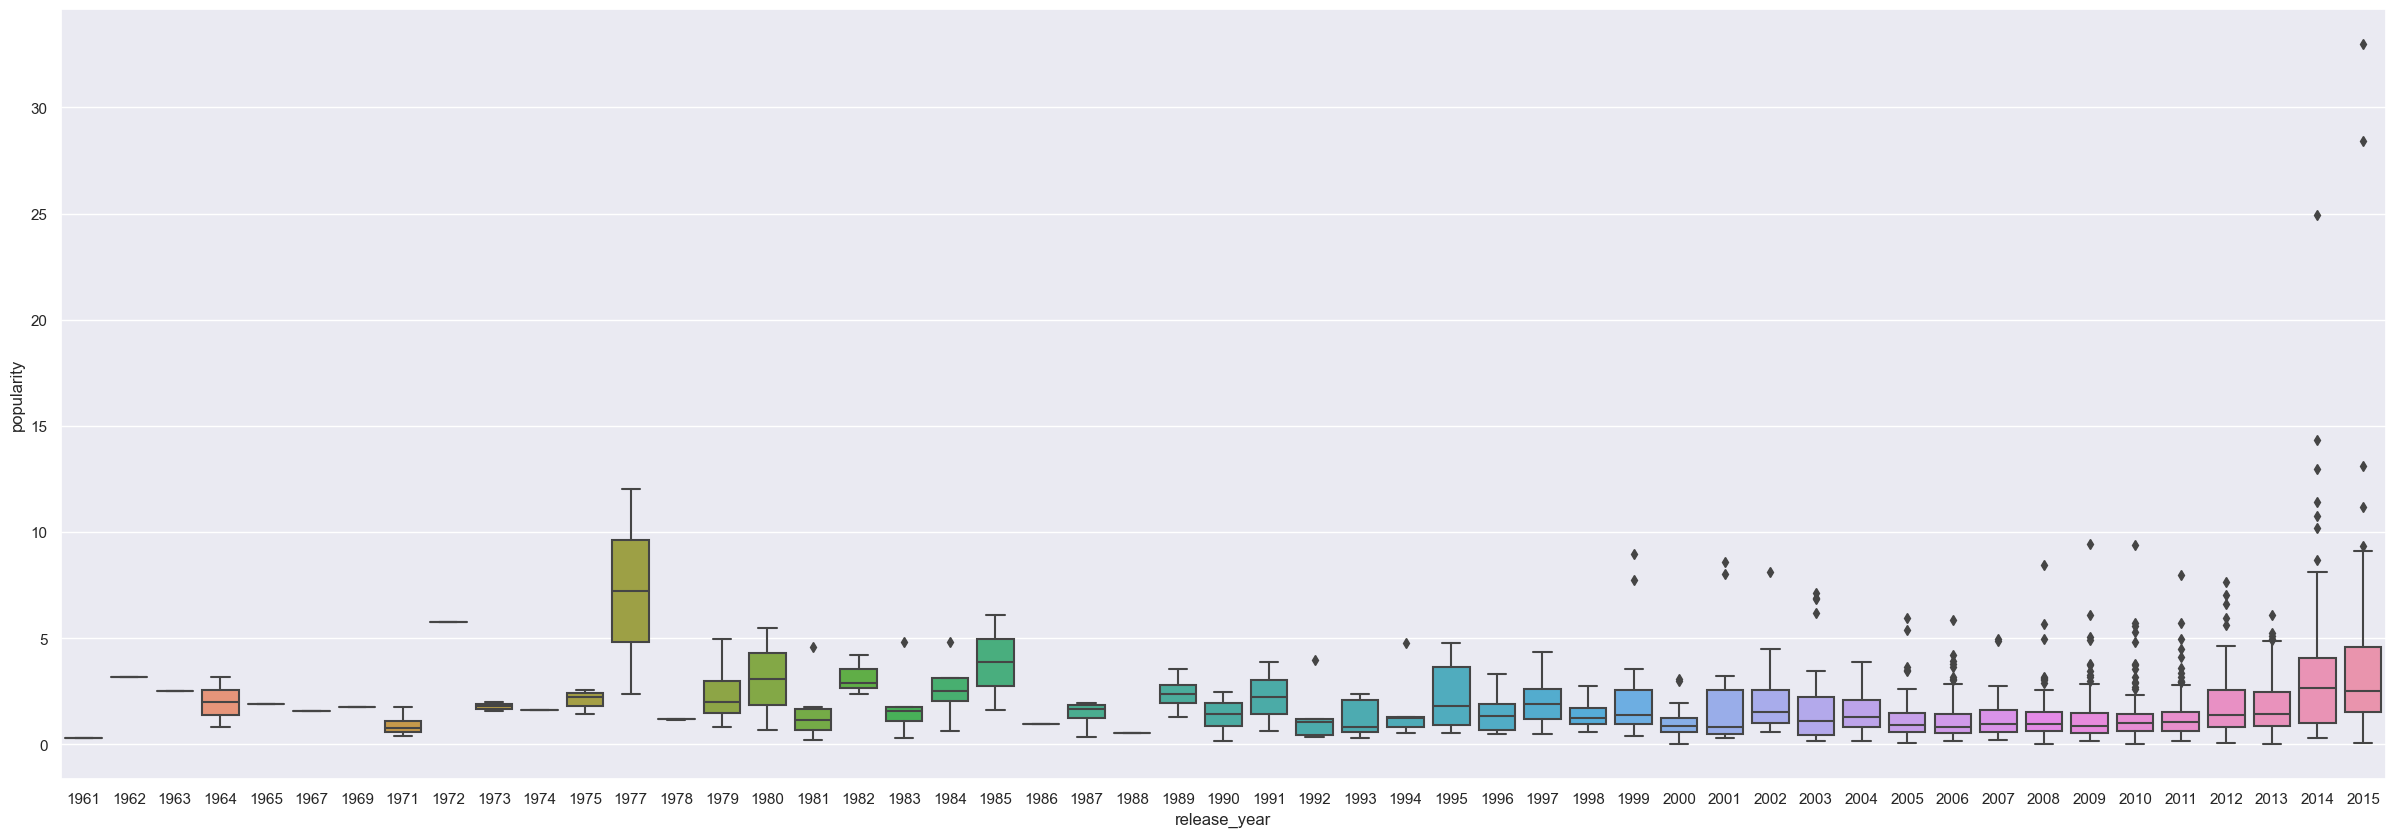

In [14]:
plt.figure(figsize=(30, 10))
data1 = allfactors[['release_year', 'popularity']]
sb.boxplot(data=data1, x="release_year", y="popularity", orient = 'v')

In [23]:
data.corr()

,release_year,profit
release_year,1.000000,-0.012674
profit,-0.012674,1.000000


In [22]:
data1.corr()

,release_year,popularity
release_year,1.000000,0.059243
popularity,0.059243,1.000000


#### *month*

<Axes: xlabel='month', ylabel='profit'>

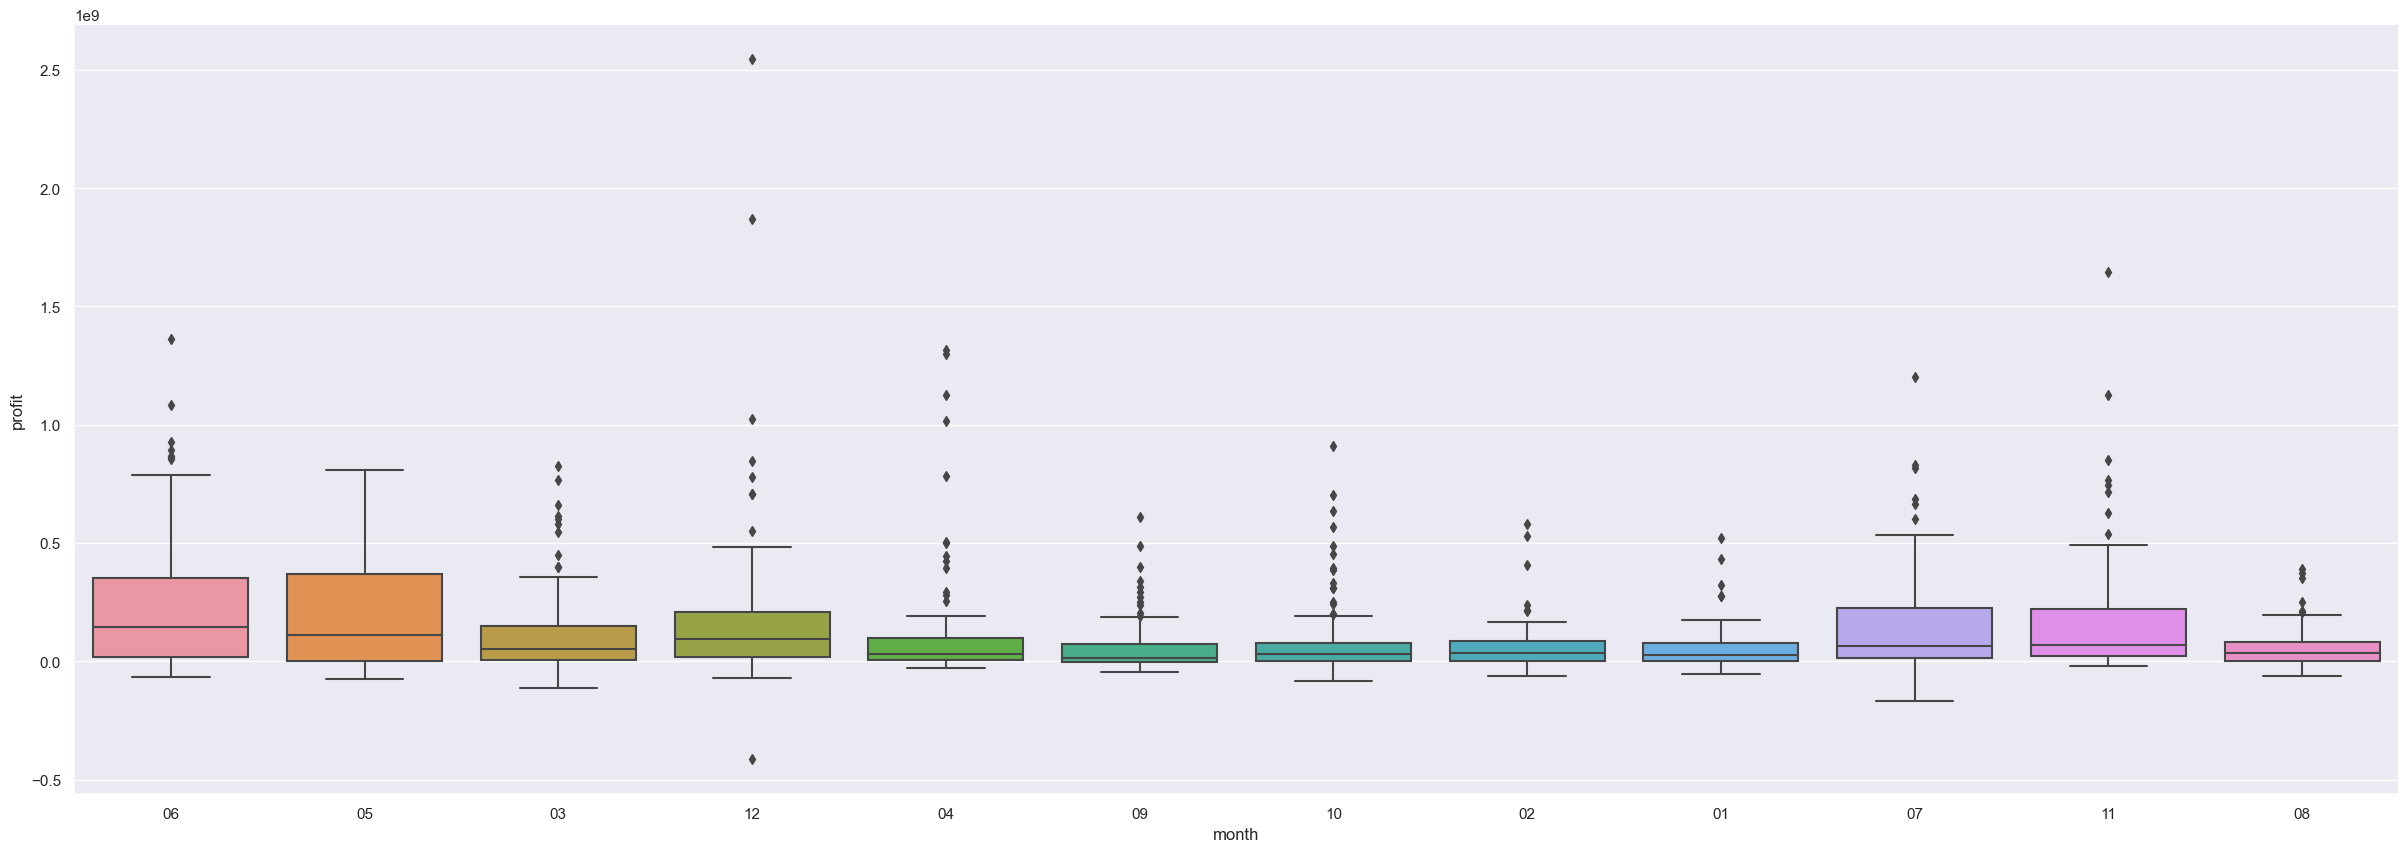

In [16]:
plt.figure(figsize=(30, 10))
data2 = allfactors[['month', 'profit']]
sb.boxplot(data=data2, x="month", y="profit", orient = 'v')

<Axes: xlabel='month', ylabel='popularity'>

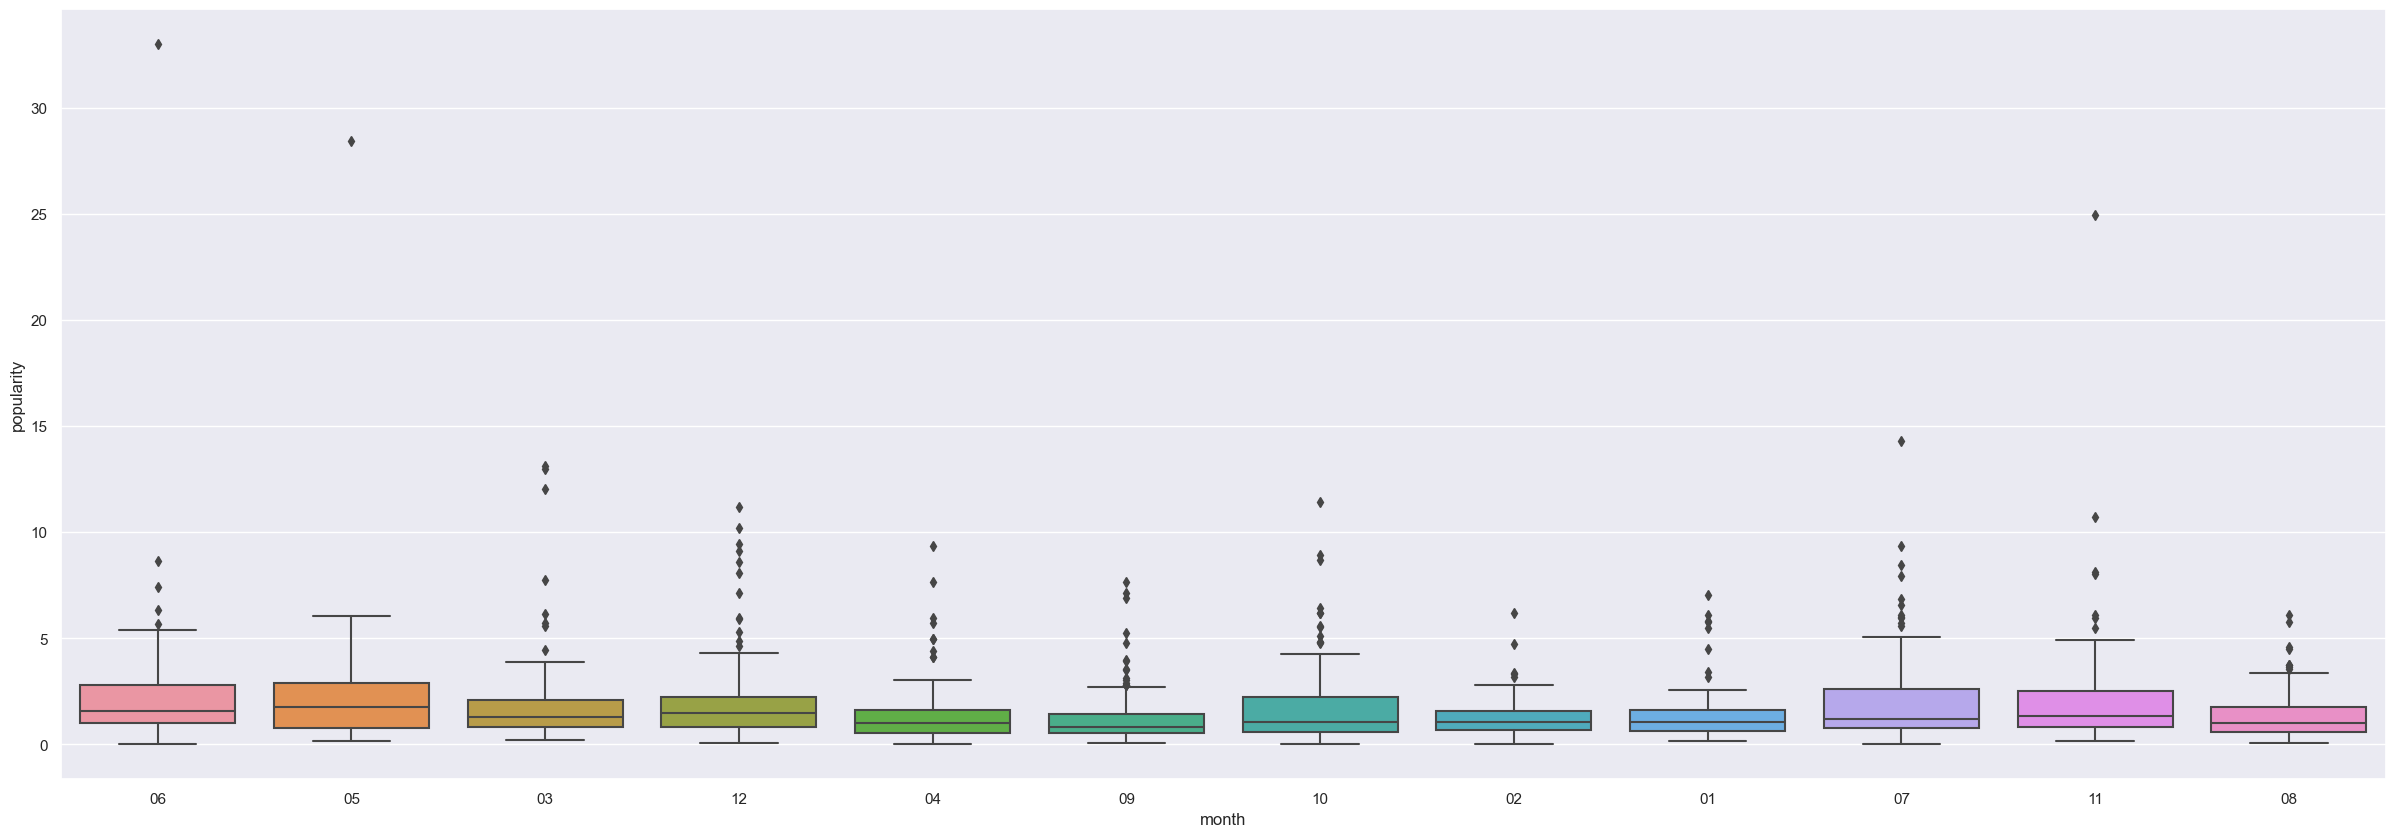

In [17]:
plt.figure(figsize=(30, 10))
data3 = allfactors[['month', 'popularity']]
sb.boxplot(data=data3, x="month", y="popularity", orient = 'v')

In [35]:
# changing the data type of month to retrieve the correlation for month and profit
data2['month'] = data2['month'].astype(int)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   month   1287 non-null   int32  
 1   profit  1287 non-null   float64
dtypes: float64(1), int32(1)
memory usage: 15.2 KB


C:\Users\USER\AppData\Local\Temp\ipykernel_21840\2750868860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['month'] = data2['month'].astype(int)


In [36]:
data2.corr()

,month,profit
month,1.000000,0.027221
profit,0.027221,1.000000


In [34]:
# changing the data type of month to retrieve the correlation for month and profit
data3['month'] = data3['month'].astype(int)
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   month       1287 non-null   int32  
 1   popularity  1287 non-null   float64
dtypes: float64(1), int32(1)
memory usage: 15.2 KB


C:\Users\USER\AppData\Local\Temp\ipykernel_21840\1047173034.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['month'] = data3['month'].astype(int)


In [32]:
data3.corr()

,month,popularity
month,1.000000,0.029035
popularity,0.029035,1.000000
